In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
openc

1. Consider a vector v ∈ R
n
. Recall that the norm of v is defined as
∥v∥ =
q
v
2
1 + v
2
2 + · · · + v
2
n
.
The root-mean-squared (rms) value of the vector v is defined as:
rms(v) = r
v
2
1 + v
2
2 + · · · + v
2
n
n
.
The average (or mean value) of the components of the vector v is defined as:
avg(v) = v1 + v2 + · · · + vn
n
.
The norm of a vector v is a measure of its size or distance from the origin and the RMS value
tells us what a “typical” value of |vi
| is.


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import nltk
# import gensim.downloader/
from nltk.tokenize import word_tokenize

Writing the norm of v and rms of v using dot products

(a) Express ∥v∥ and rms(v) using only dot product(s). You may use 1 to represent the vector
full of ones.

In [ ]:
# norm of v -> sqrt(v^2)
# len(v) = length of tensor = 3
# rms of v = sqrt((v^2)/len(v))
# avg / mean value = torch.mean(v)

#v is the tensor
v = torch.tensor([1.0,2.0,3.0],dtype=torch.float64)
# print(v)

#lets n=find norm of v
n_v = torch.sqrt(torch.dot(v,v))
print(f"Norm of vector:\n {n_v}")

# lets find root-mean squared of v
rms = torch.sqrt(torch.dot(v,v)/len(v))
print(f"Root-mean squared of vector:\n {rms}")

Norm of vector:
 3.7416573867739413
Root-mean squared of vector:
 2.160246899469287


(b) .  De-meaned or Mean-Centered:-

In [ ]:
#v is the tensor
v = torch.tensor([1.0,2.0,3.0],dtype=torch.float64)

#mean of v or avg of v
v_avg = torch.mean(v)
print(v_avg)

#de-meaned or mean-centered.
v_d_m = v - v_avg
print(f"De-meaned vector:\n {v_d_m}")

tensor(2., dtype=torch.float64)
De-meaned vector:
 tensor([-1.,  0.,  1.], dtype=torch.float64)


(c) .Avg(v_d_m)

In [ ]:
v_m_avg = torch.mean(v_d_m)
print(f"Avergae of de-meaned vector:\n {v_m_avg}")

Avergae of de-meaned vector:
 0.0


(d) . Standard Deviation of v or std(v)

In [ ]:
#de-meaned or mean-centered.
v_d_m = v - v_avg
print(f"De-meaned vector:\n {v_d_m}")

# standard deviation of mean
std_v = torch.sqrt(torch.mean(v_d_m**2))
print(std_v)

De-meaned vector:
 tensor([-1., -1., -1.], dtype=torch.float64)
tensor(1., dtype=torch.float64)


(e) . Consider std(cv) where c is constant

In [ ]:
c = 3
# v_scaled = c * v/
# std_cv = torch.sqrt(torch.mean((v_scaled - torch.mean(v_scaled))**2))
# print(std_cv)

#showing scaled standard deviation
print(c*std_v)

tensor(0., dtype=torch.float64)


(f) . Standardized version of Vector also called as z-score vector -> Questions to cover is avg(v_s) and std_v_s

In [ ]:
#in question g they are telling to find z-scores

# v = torch.tensor([1.0,1.0,1.0],dtype=torch.float64)
print(v)

v_d_m = v - torch.mean(v)
print(v_d_m)

std_v = torch.sqrt(torch.mean(v_d_m**2))
print(std_v)

# these are z-scores
v_s = (v_d_m/std_v)
print("These are z-scores",v_s)

#this is average of z-scores
avg_v_s = torch.mean(v_s)
# print(avg_v_s) # average finding first then using that to find de-meaned 0r mean centered

#this is mean-centered around z-scores
mean_centered_v_s = v_s - avg_v_s
# print(mean_centered_v_s)

#this is standard deviation of z-scores
#this show that the units for that tensors are not there
#so this value tells us that the raw scores which we have found is unit less and correct so just to prove the point that the z-scores are unitless vectors we are doing this std of z-scores
# Standard deviation of the z-scores vector.
# Since z-scores are standardized values (mean = 0, std = 1),
# this calculation should return ~1, confirming that z-scores are unitless.
# This helps demonstrate that the original units (e.g., kg, cm) have been removed during standardization.
std_v_s = torch.sqrt(torch.mean(mean_centered_v_s**2))
print(f"This is the standard deviation of the z-cores\n{std_v_s}")

tensor([1., 2., 3.], dtype=torch.float64)
tensor([-1.,  0.,  1.], dtype=torch.float64)
tensor(0.8165, dtype=torch.float64)
These are z-scores tensor([-1.2247,  0.0000,  1.2247], dtype=torch.float64)
This is the standard deviation of the z-cores
0.9999999999999999


(g) .

In [10]:
a = torch.tensor([1.0,2.0,3.0])
b = torch.tensor([4.0,5.0,6.0])

a_m = a - torch.mean(a)
print(a_m)
b_m = b - torch.mean(b)
print(b_m)

a = np.array([1.0,2.0,3.0,4,5])
b = np.array([10,4,7,3,6])

b_m = b - np.mean(b)
print(b_m)
a_m = a - np.mean(a)
print(a_m)
# res = ()/(torch.norm(a_m)*torch.norm(b_m))
print(np.cov(a_m,b_m))
# print(torch.corrcoef(a_m,b_m))

tensor([-1.,  0.,  1.])
tensor([-1.,  0.,  1.])
[ 4. -2.  1. -3.  0.]
[-2. -1.  0.  1.  2.]
[[ 2.5  -2.25]
 [-2.25  7.5 ]]


(h) .

In [ ]:
a_s = a_m / torch.std(a)
b_s = b_m / torch.std(b)
print(a_s)
print(b_s)
corr2 = torch.dot(a_s, b_s) / 2
print(corr2)

tensor([-1.,  0.,  1.])
tensor([-1.,  0.,  1.])
tensor(1.)


---

2.Consider the vectors a = [ 0 , -1 , -2 ] and b = [0 ,1 ,2 ]
. Calculate the following (you may leave the answer
in terms of fractions, square root etc.):

---

a.) rms(a)

In [ ]:
a = torch.tensor([0.0,-1.0,-2.0],dtype=torch.float64)
rms_a = torch.sqrt(torch.mean(a**2))
print(rms_a)

tensor(1.1180, dtype=torch.float64)


b.) avg(b)

In [ ]:
b = torch.tensor([0.0,1.0,2.0],dtype=torch.float64)
avg_b = torch.mean(b)
print(avg_b)
ones = torch.ones(len(b),dtype=torch.float64)
b_one = torch.dot(b,ones)
avg_b = b_one/len(b)
print(avg_b)

tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)


c.) avg(-3b)

In [ ]:
# Check this using torch and numpy
c=-3
scaled_avg_b = c*avg_b
print(scaled_avg_b)

tensor(-3., dtype=torch.float64)


d.) std(a)

In [ ]:
a = torch.tensor([0.0,-1.0,-2.0],dtype=torch.float64)

de_meaned = a - torch.mean(a)

std_a = torch.sqrt(torch.mean(de_meaned**2))
print(std_a)

std_a = torch.std(a,unbiased = False)
print(std_a)

tensor(0.8165, dtype=torch.float64)
tensor(0.8165, dtype=torch.float64)


e.) std(-3a)

In [ ]:
c = -3
# print(c*std_a)
a_c = c* a
de_mean_a = a_c - torch.mean(a_c)
std_a = torch.std(a_c,unbiased = False)
print(std_a)

tensor(-2.4495, dtype=torch.float64)
tensor(2.4495, dtype=torch.float64)


f.) The corellation co-efficient btw a and b

In [ ]:
demean_a = a - torch.mean(a)
demean_b = b - torch.mean(b)

std_a = torch.std(a,unbiased = False)
std_b = torch.std(b,unbiased = False)

z_a = demean_a/std_a
z_b = demean_b/std_b

corr = torch.dot(z_a,z_b)/len(a)
print(corr)

tensor(-1.0000, dtype=torch.float64)


g.) The distance btw a and b

In [ ]:
#norm of a and b
c = torch.norm(a-b)

print(torch.norm(c))

tensor(4.4721, dtype=torch.float64)


rad_c = (180 / torch.pi) * torch.norm(c)

h.) The angle btw a and b

In [ ]:
dot_pro = torch.dot(a,b)/(norm_a * norm_b)
rad = torch.acos(dot_pro)
print(rad)
deg = torch.rad2deg(rad)
print(deg)

tensor(3.1416, dtype=torch.float64)
tensor(180.0000, dtype=torch.float64)


---

3.) Suppose you have the option of investing in four different types of investments A, B, C, and D.
The return for each investment over the next 10 years are forecast as shown below:

---

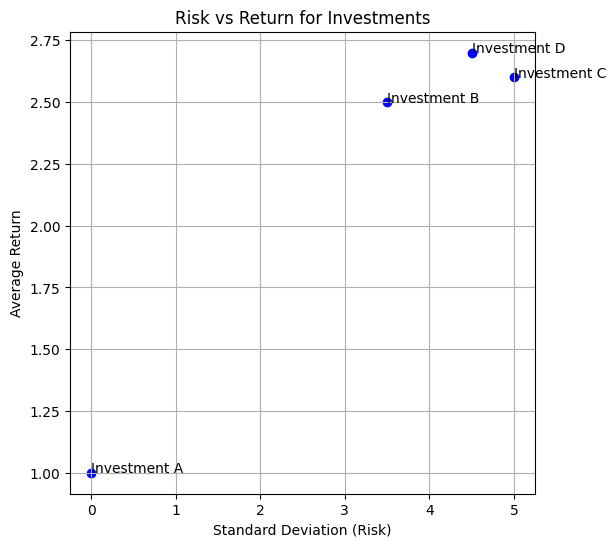

In [ ]:
# a = torch.tensor([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],dtype=torch.float64)
# b = torch.tensor([-6.5,6.5,2.5,1.0,2.5,5.0,6.5,6.25,-1.75,0.0],dtype=torch.float64)
# c = torch.tensor([2.5,4.0],dtype=torch.float64)
# d = torch.tensor([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],dtype=torch.float64)

avg_x1 = torch.tensor([1.0])
avg_x2 = torch.tensor([2.5])
avg_x3 = torch.tensor([2.6])
avg_x4 = torch.tensor([2.7])

std_x1 = torch.tensor([0.0])
std_x2 = torch.tensor([6.0 - 2.5])
std_x3 = torch.tensor([8 - 3])
std_x4 = torch.tensor([7.5 - 3.0])

averages = torch.tensor([avg_x1, avg_x2, avg_x3, avg_x4]).flatten()
std_devs = torch.tensor([std_x1, std_x2, std_x3, std_x4]).flatten()
labels = ['Investment A', 'Investment B', 'Investment C', 'Investment D']

plt.figure(figsize=(6,6))
plt.scatter(std_devs, averages, color='blue')

for i, label in enumerate(labels):
    plt.text(std_devs[i], averages[i], label)

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Average Return')
plt.title('Risk vs Return for Investments')
plt.grid(True)
plt.show()

---

4.)

---

In [ ]:
# 4th
# a
# in adjacency matrix take col by col
A = torch.tensor([[0,1,0,1],
                  [1,0,0,0],
                  [1,0,0,0],
                  [0,1,1,0]])
# b


# here we take dataframe and its like rows in

# Ae3 is also called a3

In [ ]:
# 7th is easy

A = torch.tensor([[0,0,0,0,1],
                  [1,0,0,0,0],
                  [0,1,0,0,0],
                  [0,0,1,0,0],
                  [0,0,0,1,0]],dtype=torch.float64)

x = torch.tensor([1,2,3,4,5],dtype=torch.float64)

Ax = torch.matmul(A,x)
print(Ax)
#shows te movement of matrix in dim-0
A2 = torch.matmul(A,A)
print(A2)

A5 = torch.matmul(torch.matmul(torch.matmul(A,A2),A),A)
print(A5)

A5x = torch.matmul(A5,x)
print(A5x)

tensor([5., 1., 2., 3., 4.], dtype=torch.float64)
tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]], dtype=torch.float64)
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], dtype=torch.float64)
tensor([1., 2., 3., 4., 5.], dtype=torch.float64)


In [ ]:
# 5th
# 3-Day Offset Vector
3-day-average-deviation-vector = torch.tensor([
    [-1/3, -1/3, -1/3, 1, 0, 0],
    [0, -1/3, -1/3, -1/3, 1, 0],
    [0, 0, -1/3, -1/3, -1/3, 1]], dtype=torch.float32)


Covid-cases = torch.tensor([100, 123, 953, 152, 134, 166], dtype=torch.float32)

d = torch.matmul(A,c)

print("Matrix A:\n", A)
print("Vector c:", c)
print("Vector d:", d)


Matrix A:
 tensor([[-0.3333, -0.3333, -0.3333,  1.0000,  0.0000,  0.0000],
        [ 0.0000, -0.3333, -0.3333, -0.3333,  1.0000,  0.0000],
        [ 0.0000,  0.0000, -0.3333, -0.3333, -0.3333,  1.0000]])
Vector c: tensor([100., 123., 953., 152., 134., 166.])
Vector d: tensor([-240.0000, -275.3333, -247.0000])


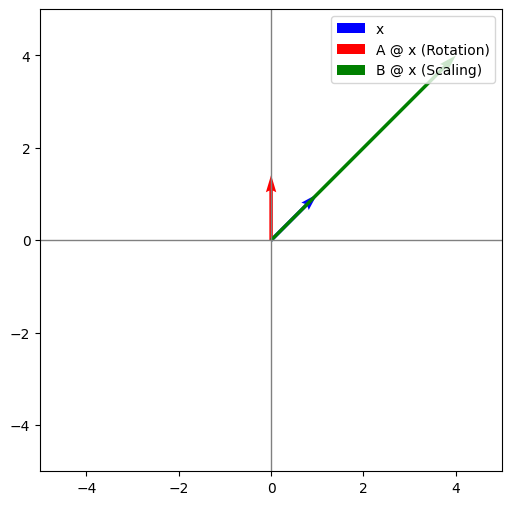

In [ ]:
import torch
import matplotlib.pyplot as plt
import math

# Given vector
x = torch.tensor([1.0, 1.0])

# Rotation matrix A for theta = pi/4
theta = math.pi / 4
A = torch.tensor([
    [math.cos(theta), -math.sin(theta)],
    [math.sin(theta),  math.cos(theta)]
])

# Scaling matrix B
B = torch.tensor([
    [4.0, 0.0],
    [0.0, 4.0]
])

# Multiply
Ax = A @ x
Bx = B @ x

# Plot
plt.figure(figsize=(6,6))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Original vector
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='x')

# After rotation
plt.quiver(0, 0, Ax[0], Ax[1], angles='xy', scale_units='xy', scale=1, color='red', label='A @ x (Rotation)')

# After scaling
plt.quiver(0, 0, Bx[0], Bx[1], angles='xy', scale_units='xy', scale=1, color='green', label='B @ x (Scaling)')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


NameError: name 'avg_x1' is not defined